# Task 2

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading and Reading the dataset

In [2]:
# Get current working directory
cwd = os.getcwd()

# Read the cleaned DataFrame from the CSV file
df = pd.read_csv(cwd + "/data/customer_booking.csv", encoding="ISO-8859-1")

# Display the first few rows of the DataFrame
df.head()

# Display the shape of the DataFrame (number of rows and columns)
df.shape

# Generate descriptive statistics of the DataFrame
df.describe()

# Display concise summary information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers traveling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

### Sales Channel

In [3]:
# Calculate the percentage of bookings done through internet
percentage_internet = df.sales_channel.value_counts().values[0] / df.sales_channel.count() * 100

# Calculate the percentage of bookings done through mobile
percentage_mobile = df.sales_channel.value_counts().values[1] / df.sales_channel.count() * 100

# Print the number of bookings done through internet
print(f"Number of bookings done through internet: {percentage_internet} %")

# Print the number of bookings done through phone call
print(f"Number of bookings done through phone call: {percentage_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


### Trip Type

In [4]:
# Calculate the percentage of round trips
percentage_round = df.trip_type.value_counts().values[0] / df.trip_type.count() * 100

# Calculate the percentage of one-way trips
percentage_oneway = df.trip_type.value_counts().values[1] / df.trip_type.count() * 100

# Calculate the percentage of circle trips
percentage_circle = df.trip_type.value_counts().values[2] / df.trip_type.count() * 100

# Print the percentage of round trips
print(f"Percentage of round trips: {percentage_round} %")

# Print the percentage of one-way trips
print(f"Percentage of One way trips: {percentage_oneway} %")

# Print the percentage of circle trips
print(f"Percentage of circle trips: {percentage_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


### Purchase Lead

Counts of potential outliers: purchase_lead
False    49992
True         8
Name: count, dtype: int64


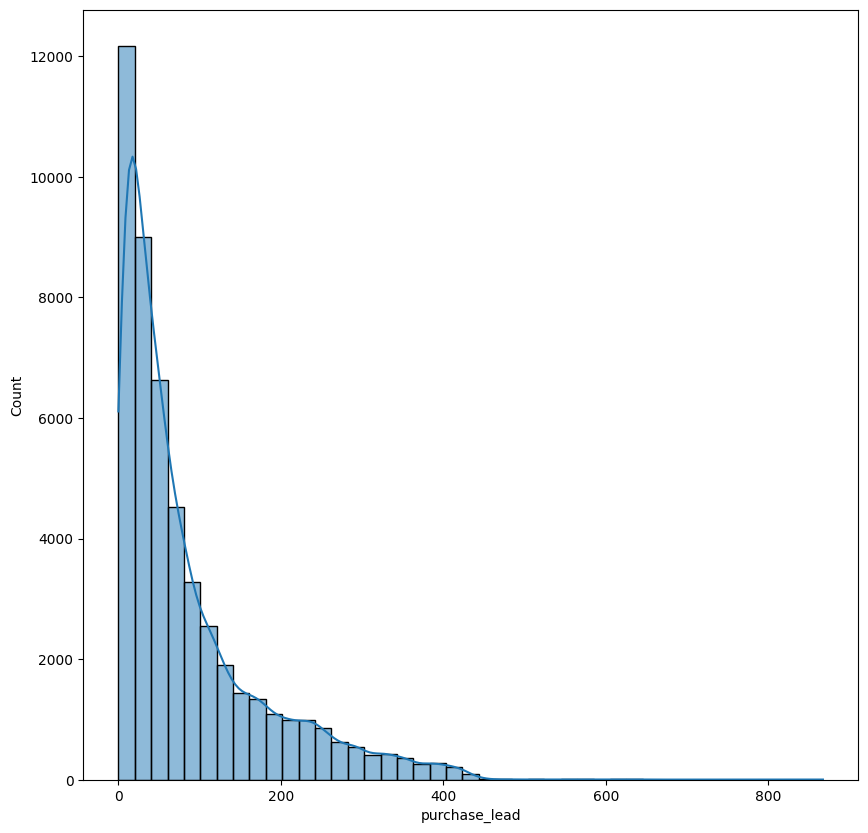

In [5]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Plot a histogram of purchase_lead variable with a bin width of 20 and overlay a kernel density estimate
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True)

# Identify potential outliers in the purchase_lead variable
# Some bookings were made more than 2 years before the travel date, which seems unlikely
# Outliers could also be due to cancellation and re-booking within a 6-month period
# Airlines typically keep tickets for re-booking within a year
# These outliers could significantly impact the results of the predictive model
outlier_counts = (df.purchase_lead > 600).value_counts()

# Print the counts of outliers
print("Counts of potential outliers:", outlier_counts)

# Remove entries with purchase_lead more than 600 days (1.5 years)
# This assumption helps remove potential outliers from the dataset
df = df[df.purchase_lead < 600]

Counts of potential outliers: purchase_lead
False    49992
Name: count, dtype: int64


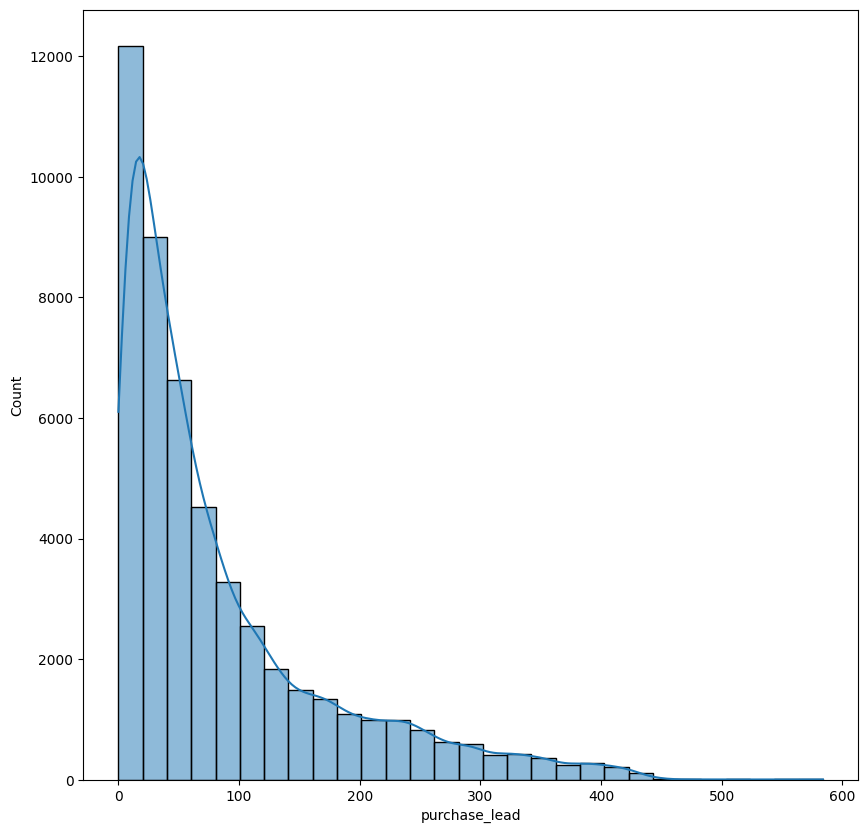

In [6]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Plot a histogram of purchase_lead variable with a bin width of 20 and overlay a kernel density estimate
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True)

# Identify potential outliers in the purchase_lead variable
# Some bookings were made more than 2 years before the travel date, which seems unlikely
# Outliers could also be due to cancellation and re-booking within a 6-month period
# Airlines typically keep tickets for re-booking within a year
# These outliers could significantly impact the results of the predictive model
outlier_counts = (df.purchase_lead > 600).value_counts()

# Print the counts of outliers
print("Counts of potential outliers:", outlier_counts)

# Remove entries with purchase_lead more than 600 days (1.5 years)
# This assumption helps remove potential outliers from the dataset
df = df[df.purchase_lead < 600]


### Length Of Stay

Counts of potential outliers: length_of_stay
False    49713
True       279
Name: count, dtype: int64
Booking status for entries with length_of_stay > 500 days: booking_complete
0    9
1    1
Name: count, dtype: int64


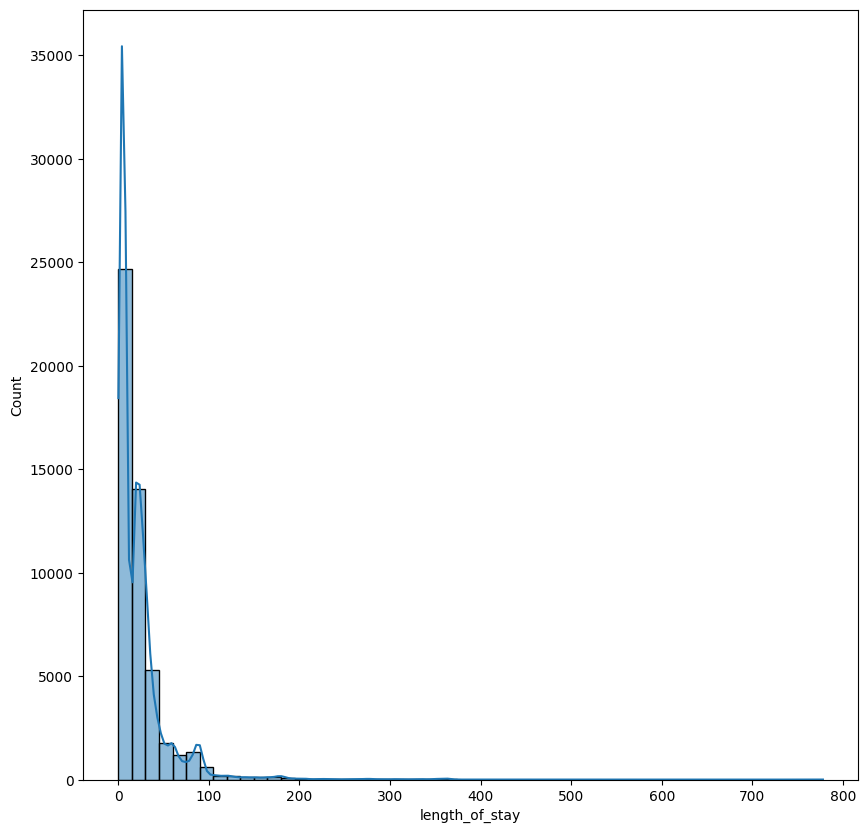

In [7]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Plot a histogram of length_of_stay variable with a bin width of 15 and overlay a kernel density estimate
sns.histplot(data=df, x="length_of_stay", binwidth=15, kde=True)

# Identify entries with length_of_stay exceeding 200 days
# These entries may indicate longer stays which could be outliers
outlier_counts = (df.length_of_stay > 200).value_counts()

# Print the counts of potential outliers
print("Counts of potential outliers:", outlier_counts)

# Check the booking status for entries with length_of_stay exceeding 500 days
# This helps understand if these long stays are completed bookings or not
booking_status_counts = df[df.length_of_stay > 500].booking_complete.value_counts()

# Print the counts of booking status for entries with length_of_stay exceeding 500 days
print("Booking status for entries with length_of_stay > 500 days:", booking_status_counts)

# We need more business knowledge to decide whether to remove entries with length_of_stay exceeding 500 days
# There could be various reasons for such long stays, so we'll focus on stays less than 500 days for now
# Filtering the data to have only length of stay less than 500 days
df = df[df.length_of_stay < 500]



### Flight Day

In [8]:
import pandas as pd

# Define a mapping dictionary to map weekdays to numbers
weekday_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}
    
# Map the flight day to the corresponding number of the week using the defined mapping
df.flight_day = df.flight_day.map(weekday_mapping)

# Display the counts of flights scheduled on each day of the week
flight_day_counts = df.flight_day.value_counts()

# Print the counts of flights scheduled on each day of the week
print("Counts of flights scheduled on each day of the week:", flight_day_counts)

Counts of flights scheduled on each day of the week: flight_day
1    8099
3    7672
2    7671
4    7419
5    6759
7    6553
6    5809
Name: count, dtype: int64


### Booking Origin

Text(0, 0.5, 'Number of bookings')

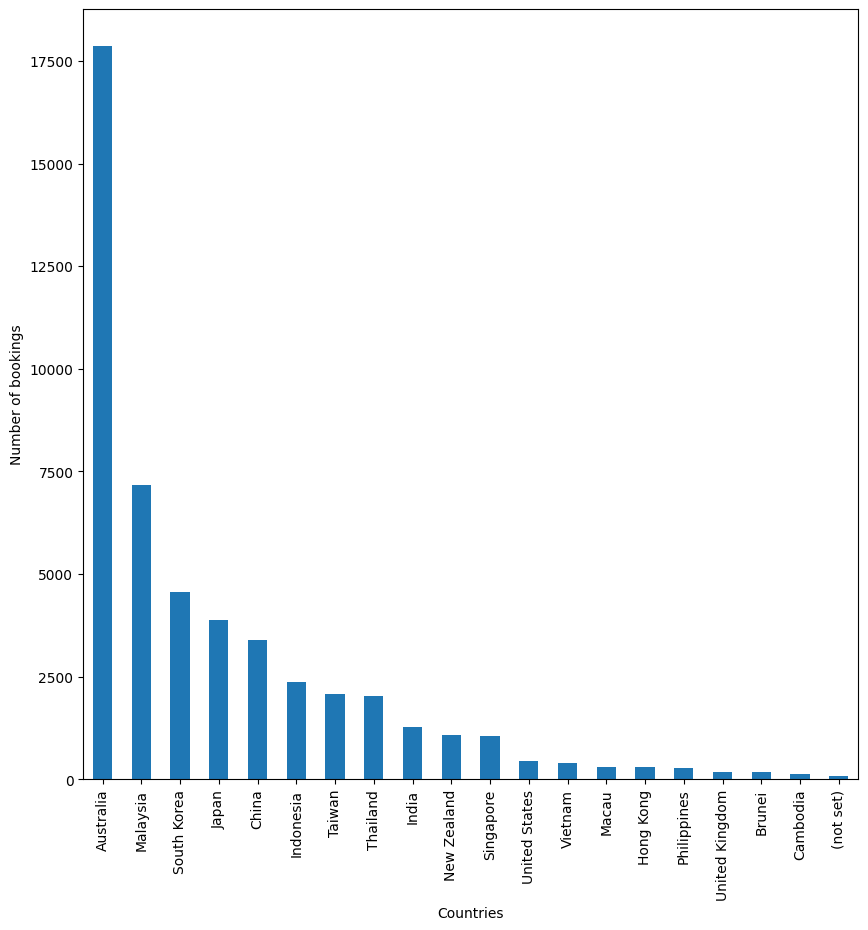

In [9]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Plot a bar chart showing the top 20 countries with the highest number of bookings
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")

# Set the x-axis label
ax.set_xlabel("Countries")

# Set the y-axis label
ax.set_ylabel("Number of bookings")

# Provide a comment explaining the purpose of the chart
# The chart displays the countries from which travelers had the highest number of booking applications

Text(0, 0.5, 'Number of complete bookings')

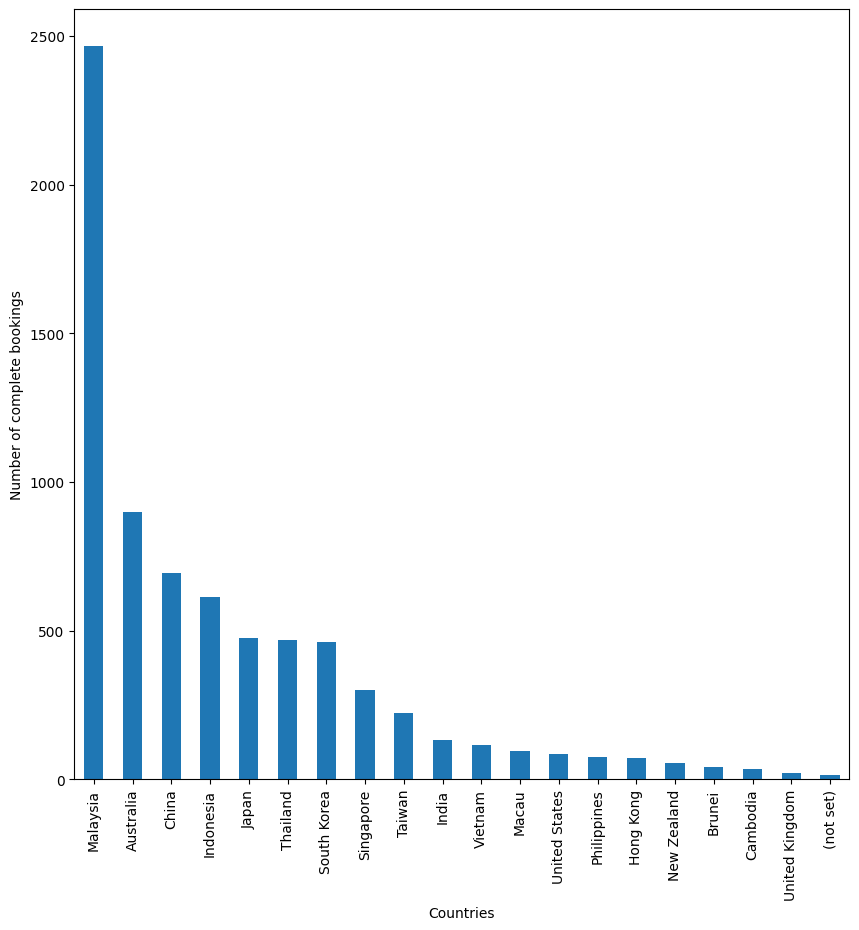

In [10]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Plot a bar chart showing the top 20 countries with the highest number of complete bookings
ax = df[df.booking_complete == 1].booking_origin.value_counts()[:20].plot(kind="bar")

# Set the x-axis label
ax.set_xlabel("Countries")

# Set the y-axis label
ax.set_ylabel("Number of complete bookings")

# Provide a comment explaining the purpose of the chart
# The chart displays the countries from which travelers had the highest number of complete bookings


### Booking complete

In [11]:
# Calculate the percentage of successful bookings
successful_booking_percentage = df.booking_complete.value_counts().values[0] / len(df) * 100

# Calculate the percentage of unsuccessful bookings
unsuccessful_booking_percentage = 100 - successful_booking_percentage

# Print the percentage of successful and unsuccessful bookings
print(f"Out of {len(df)} booking entries, only {round(unsuccessful_booking_percentage, 2)}% bookings were successful or complete.")

# This will save the cleaned data to a new CSV file in the current working directory
df.to_csv(cwd + "/data/cleaned_customer_booking.csv")

Out of 49982 booking entries, only 14.96% bookings were successful or complete.


# Predictive Model

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set font size for plots
plt.rcParams.update({'font.size': 14})

# Get current working directory
cwd = os.getcwd()

# Read the cleaned DataFrame from the CSV file
df = pd.read_csv(cwd + "/data/cleaned_customer_booking.csv", index_col=0)

# Make a copy of the DataFrame (if needed for further processing)
df_final = df.copy()

# Displaying the data
df


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [13]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot encode the "sales_channel" feature
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

# One-hot encode the "trip_type" feature
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTrip', 1:'OneWayTrip', 2:'CircleTrip'})
df_final = df_final.join(encoder_df)

# Drop categorical columns now that they have been one-hot encoded
df_final.drop(['sales_channel', 'trip_type', 'booking_origin', 'route'], axis=1, inplace=True)

# Store the label for supervised learning
label = df['booking_complete']

# Drop the "booking_complete" column from the final DataFrame
df_final = df_final.drop('booking_complete', axis=1)

# Display the data
df_final


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,NaN,NaN,NaN,NaN,NaN
49996,1,111,6,4,7,0,0,0,5.62,NaN,NaN,NaN,NaN,NaN
49997,1,24,6,22,6,0,0,1,5.62,NaN,NaN,NaN,NaN,NaN
49998,1,15,6,11,1,1,0,1,5.62,NaN,NaN,NaN,NaN,NaN


## Normalizaing the values

In [14]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data using the StandardScaler
scaled_data = scaler.fit_transform(df_final)

# Create a DataFrame of scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_final.columns)

# Add the labels back to the DataFrame
scaled_df['label'] = label

# Display the scaled data along with labels
scaled_df


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400594,1.964979,-0.119575,-0.381719,1.096713,0.703619,-0.649929,-0.863380,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
1,-0.579556,0.301151,-0.089155,-1.120754,1.096713,-1.421224,-0.649929,-0.863380,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
2,0.400594,1.754227,-0.028314,1.465867,-0.408681,0.703619,1.538629,-0.863380,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
3,-0.579556,0.123676,0.245467,-0.935995,1.096713,-1.421224,-0.649929,1.158238,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
4,0.400594,-0.186906,-0.028314,1.096350,-0.408681,0.703619,-0.649929,1.158238,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400594,-0.641685,-0.515037,-0.012202,1.096713,0.703619,-0.649929,1.158238,-1.107208,NaN,NaN,NaN,NaN,NaN,1.0
49978,-0.579556,0.290058,-0.515037,-0.935995,1.598511,-1.421224,-0.649929,-0.863380,-1.107208,NaN,NaN,NaN,NaN,NaN,0.0
49979,-0.579556,-0.674962,-0.515037,2.389660,1.096713,-1.421224,-0.649929,1.158238,-1.107208,NaN,NaN,NaN,NaN,NaN,0.0
49980,-0.579556,-0.774792,-0.515037,0.357315,-1.412277,0.703619,-0.649929,1.158238,-1.107208,NaN,NaN,NaN,NaN,NaN,1.0


## Correlation matrix

<Axes: >

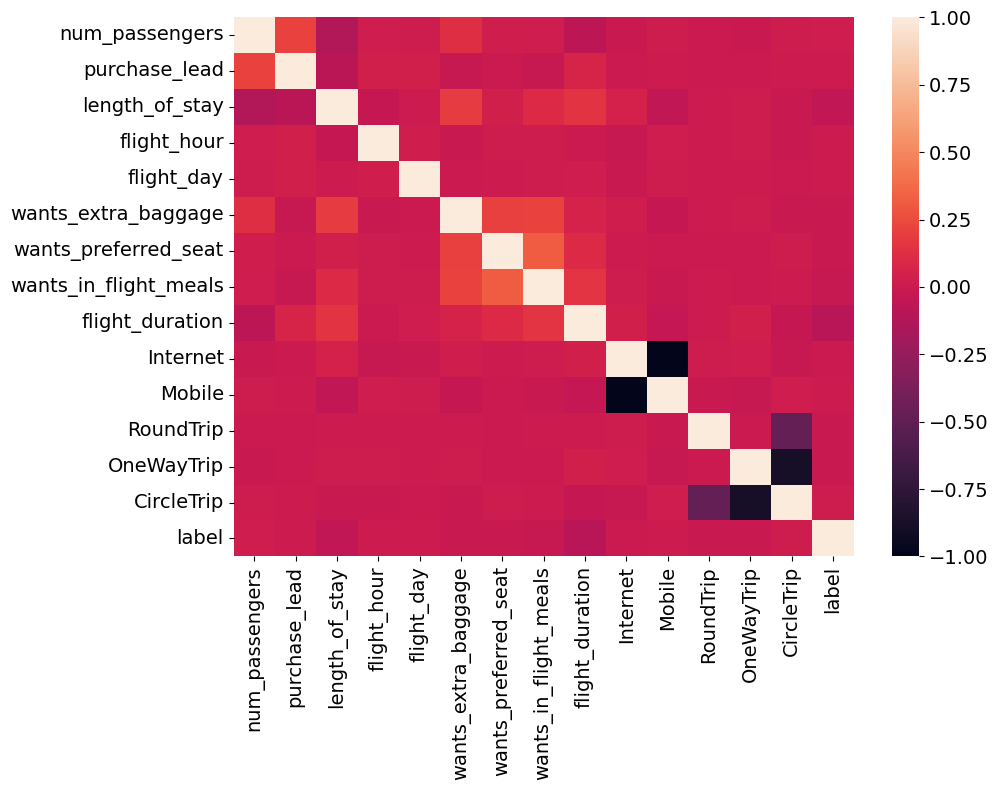

In [15]:
# Compute the correlation matrix
corr = scaled_df.corr()

# Set the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(corr)

# Provide a comment explaining the purpose of the code
# The heatmap shows the correlation matrix of the scaled features


## Splitting Train and Test Data

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.inspection import permutation_importance
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Split the data into features (X) and labels (y)
X = scaled_df.iloc[:, :-1]
y = scaled_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

# Define functions to fit and predict values, and to evaluate model performance
def model_fit_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

def accuracy_score_custom(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def precision_score_custom(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f1_score_custom(y_true, y_pred):
    return f1_score(y_true, y_pred)

# Print statement to confirm the function definitions
print("Functions for model fitting, prediction, and evaluation are defined.")

Functions for model fitting, prediction, and evaluation are defined.


# Random Forest Classifier

In [17]:
# Create an instance of the RandomForestClassifier and fit the training data
random_forest_classifier = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

### Checking Training accuracy

Accuracy, precision, and F1-score for training data are 0.92, 1.0, and 0.66 respectively


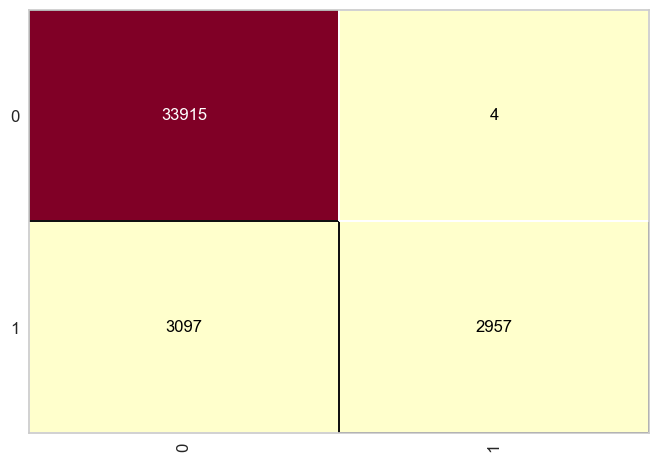

In [18]:
# Remove rows with missing target values from the training data
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

# Predict the training labels using the fitted model
predicted_labels_train = model_fit_predict(random_forest_classifier, X_train, y_train, X_train)

# Calculate unique predicted labels
unique_predicted_labels_train = set(predicted_labels_train)

# Calculate F1 score for the training data
f1_score_train = round(f1_score(y_train, predicted_labels_train), 2)

# Calculate accuracy score for the training data
accuracy_score_train = round(accuracy_score(y_train, predicted_labels_train), 2)

# Calculate precision score for the training data
precision_score_train = round(precision_score(y_train, predicted_labels_train), 2)

# Print the accuracy, precision, and F1 score for the training data
print(f"Accuracy, precision, and F1-score for training data are {accuracy_score_train}, {precision_score_train}, and {f1_score_train} respectively")

# Create a confusion matrix for the RandomForestClassifier
confusion_matrix = ConfusionMatrix(random_forest_classifier, classes=[0, 1])

# Fit the confusion matrix with the training data
confusion_matrix.fit(X_train, y_train)

# Score the confusion matrix with the training data
confusion_matrix_score = confusion_matrix.score(X_train, y_train)


### Checking Testing accuracy

In [19]:
# Identify and remove rows with missing true labels from the test data
X_test = X_test[~np.isnan(y_test)]
y_test = y_test[~np.isnan(y_test)]

# Predict the test labels using the fitted model
predicted_labels_test = model_fit_predict(random_forest_classifier, X_train, y_train, X_test)

# Calculate F1 score for the test data
f1_score_test = round(f1_score(y_test, predicted_labels_test), 2)

# Calculate accuracy score for the test data
accuracy_score_test = round(accuracy_score(y_test, predicted_labels_test), 2)

# Calculate precision score for the test data
precision_score_test = round(precision_score(y_test, predicted_labels_test), 2)

# Print the accuracy, precision, and F1-score for the test data
print(f"Accuracy, precision, and F1-score for test data are {accuracy_score_test}, {precision_score_test}, and {f1_score_test} respectively")

Accuracy, precision, and F1-score for test data are 0.86, 0.27, and 0.02 respectively


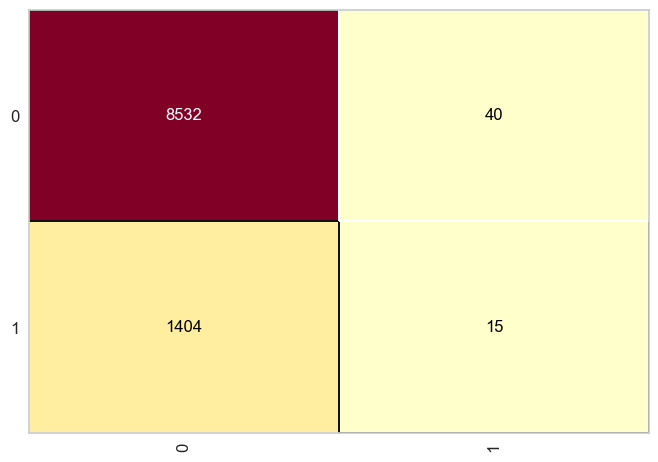

In [20]:
# Create a confusion matrix visualization for the RandomForestClassifier
confusion_matrix_visualizer = ConfusionMatrix(random_forest_classifier, classes=[0, 1])

# Fit the confusion matrix visualization with the training data
confusion_matrix_visualizer.fit(X_train, y_train)

# Score the confusion matrix visualization with the test data
confusion_matrix_visualizer_score = confusion_matrix_visualizer.score(X_test, y_test)


In [21]:
# One major problem behind getting low F1 score is imbalanced dataset. 
# We have higher entries that are classified 0 than 1. 
# We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1. 

## Balancing the dataset

In [22]:
# Count the occurrences of each label in the dataset
label_counts = scaled_df.label.value_counts()

# Create a DataFrame containing 8000 samples with label 0
scaled_df_label_0 = scaled_df[scaled_df.label == 0].sample(n=8000)

# Concatenate the DataFrame with label 1 and the DataFrame with label 0
scaled_df_combined = pd.concat([scaled_df[scaled_df.label == 1], scaled_df_label_0], ignore_index=True)

# Shuffle the rows of the combined DataFrame
scaled_df_combined_shuffled = scaled_df_combined.sample(frac=1).reset_index(drop=True)

# Display the combined and shuffled DataFrame
scaled_df_combined_shuffled


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400594,2.563957,-0.180415,-0.381719,0.093117,-1.421224,-0.649929,-0.863380,1.037308,0.355715,-0.355715,-0.04824,-0.088352,0.100845,1.0
1,2.360895,0.367704,-0.180415,-0.751237,0.093117,0.703619,1.538629,-0.863380,1.037308,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
2,-0.579556,-0.275643,0.336728,-0.196961,-1.412277,0.703619,-0.649929,-0.863380,-0.185266,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
3,0.400594,3.462424,-0.515037,0.911591,0.093117,0.703619,-0.649929,-0.863380,-1.741877,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
4,0.400594,-0.652778,2.101097,-0.935995,1.096713,0.703619,-0.649929,-0.863380,-1.688431,0.355715,-0.355715,-0.04824,-0.088352,0.100845,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15468,-0.579556,-0.796976,-0.545457,1.096350,0.594915,-1.421224,1.538629,1.158238,-1.107208,-2.811239,2.811239,-0.04824,-0.088352,0.100845,0.0
15469,-0.579556,0.057122,-0.606297,0.911591,0.594915,0.703619,-0.649929,-0.863380,-0.439134,0.355715,-0.355715,-0.04824,-0.088352,0.100845,0.0
15470,0.400594,-0.830253,-0.575877,-0.751237,-1.412277,0.703619,1.538629,1.158238,-1.741877,0.355715,-0.355715,-0.04824,-0.088352,0.100845,1.0
15471,0.400594,-0.419842,-0.545457,0.172556,1.598511,-1.421224,1.538629,-0.863380,-0.439134,-2.811239,2.811239,-0.04824,-0.088352,0.100845,0.0


In [28]:
# Split the data into features (X) and labels (y)
X = scaled_df_combined_shuffled.iloc[:, :-1]
y = scaled_df_combined_shuffled['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

# Create an instance of the RandomForestClassifier and fit the training data
random_forest_classifier = RandomForestClassifier(n_estimators=50, max_depth=50, min_samples_split=5, random_state=0)
y_pred_test = model_fit_predict(random_forest_classifier, X_train, y_train, X_test)

# Calculate evaluation metrics for the test data
f1_score_test = round(f1_score(y_test, y_pred_test), 2)
accuracy_score_test = round(accuracy_score(y_test, y_pred_test), 2)
precision_score_test = round(precision_score(y_test, y_pred_test), 2)
recall_score_test = round(recall_score(y_test, y_pred_test), 2)
specificity_score_test = round(recall_score(y_test, y_pred_test, pos_label=0), 2)

# Print evaluation metrics for the test data
print(f"Accuracy, precision, recall, specificity, and F1-score for test data are {accuracy_score_test}, {precision_score_test}, {recall_score_test}, {specificity_score_test}, and {f1_score_test} respectively")

Accuracy, precision, recall, specificity, and F1-score for test data are 0.58, 0.58, 0.53, 0.63, and 0.55 respectively


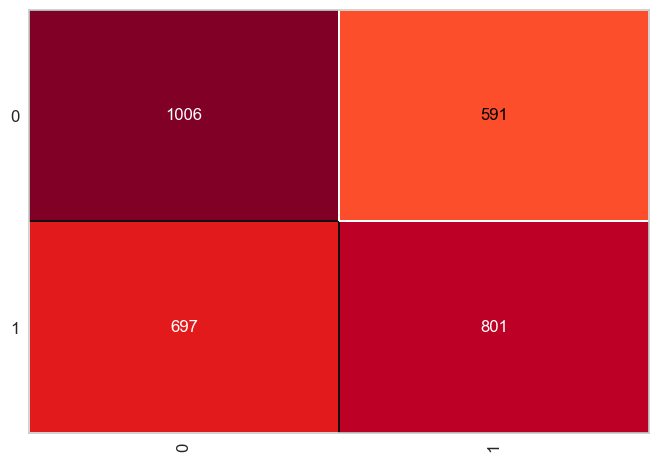

In [24]:
# Create a confusion matrix visualization for the RandomForestClassifier
confusion_matrix_visualizer = ConfusionMatrix(random_forest_classifier, classes=[0, 1])

# Fit the confusion matrix visualization with the training data
confusion_matrix_visualizer.fit(X_train, y_train)

# Score the confusion matrix visualization with the test data
confusion_matrix_visualizer_score = confusion_matrix_visualizer.score(X_test, y_test)

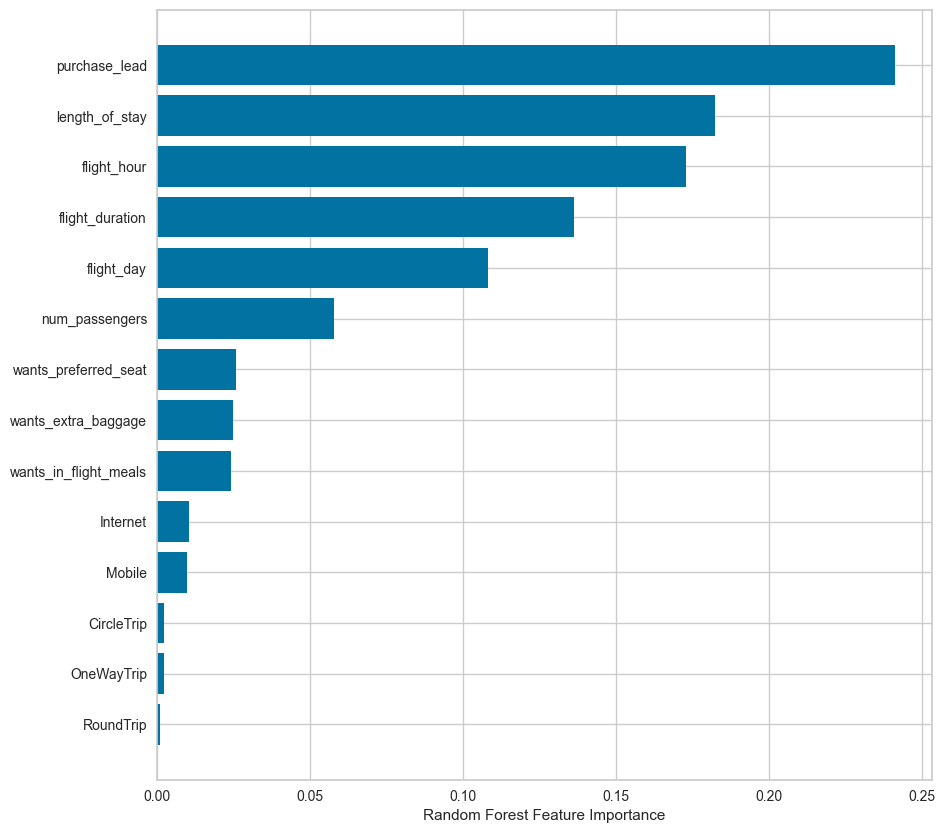

In [27]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Get the indices of sorted feature importances
sorted_idx = random_forest_classifier.feature_importances_.argsort()

# Create a horizontal bar plot to visualize feature importances
plt.barh(X.columns[sorted_idx], random_forest_classifier.feature_importances_[sorted_idx])

# Set labels for the x-axis and y-axis
plt.xlabel("Random Forest Feature Importance")

# Display the plot
plt.show()
